In [88]:
import qiskit
from qiskit import quantum_info
from qiskit.execute_function import execute
from qiskit import BasicAer
import numpy as np
import pickle
import json
import os
from collections import Counter
from sklearn.metrics import mean_squared_error
from typing import Dict, List
import matplotlib.pyplot as plt

#define utility functions

def simulate(circuit: qiskit.QuantumCircuit) -> dict:
    """Simulate the circuit, give the state vector as the result."""
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    state_vector = result.get_statevector()
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return histogram


def histogram_to_category(histogram):
    """This function take a histogram representations of circuit execution results, and process into labels as described in 
    the problem description."""
    assert abs(sum(histogram.values())-1)<1e-8
    positive=0
    for key in histogram.keys():
        digits = bin(int(key))[2:].zfill(20)
        if digits[-1]=='0':
            positive+=histogram[key]
        
    return positive


def count_gates(circuit: qiskit.QuantumCircuit) -> Dict[int, int]:
    """Returns the number of gate operations with each number of qubits."""
    counter = Counter([len(gate[1]) for gate in circuit.data])
    #feel free to comment out the following two lines. But make sure you don't have k-qubit gates in your circuit
    #for k>2
    for i in range(2,20):
        assert counter[i]==0
        
    return counter


def image_mse(image1,image2):
    # Using sklearns mean squared error:
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    return mean_squared_error(image1, image2)

In [8]:
#load the mock data (for testing only)
files=os.listdir("mock_data")
dataset=list()
for file in files:
    with open('mock_data/'+file, "r") as infile:
        loaded = json.load(infile)
        dataset.append(loaded)

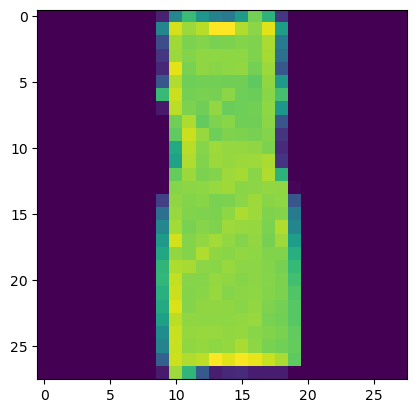

In [73]:
#load the actual hackthon data (fashion-mnist)
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
#you can visualize it
import matplotlib.pyplot as plt
plt.imshow(images[1100])

#print(images[0])
#print(np.max(images[0]))

In [87]:
#grade part1

import part1
from importlib import reload
reload(part1)

from part1 import *

n_shots = 65535
dataset = images

#n_qubits = np.ceil(2*np.log2(dataset.shape[1])).astype(int)

n=len(dataset)
mse=0
gatecount=0

for data in dataset[:2]:

    #encode image into circuit
    circuit = encode(data)
    
    #count the number of 2-qubit gates
    gatecount += count_gates(circuit)[2]

    #simulate circuit
    #histogram=simulate(circuit)
    histogram = simulate(circuit)
    
    #reconstruct the image
    image_re = decode(histogram)

    #calculate mse
    mse += image_mse(data,image_re)
    
#fidelity of reconstruction
f=1-mse
gatecount=gatecount/n

#score for part1 
print(f*(0.999**gatecount))

OrderedDict([('cx', 10368), ('u3', 3334), ('u', 3213), ('u2', 5)])
Counter({2: 10368, 1: 6552})
OrderedDict([('cx', 11008), ('u3', 3648), ('u', 3529), ('u2', 5)])
Counter({2: 11008, 1: 7182})
OrderedDict([('cx', 9984), ('u3', 3145), ('u', 3024), ('u2', 5)])
Counter({2: 9984, 1: 6174})
OrderedDict([('cx', 9984), ('u3', 3145), ('u', 3024), ('u2', 5)])
Counter({2: 9984, 1: 6174})
OrderedDict([('cx', 9344), ('u3', 2830), ('u', 2709), ('u2', 5)])
Counter({2: 9344, 1: 5544})
OrderedDict([('cx', 9344), ('u3', 2830), ('u', 2709), ('u2', 5)])
Counter({2: 9344, 1: 5544})
OrderedDict([('cx', 7936), ('u3', 2137), ('u', 2016), ('u2', 5)])
Counter({2: 7936, 1: 4158})
OrderedDict([('cx', 8704), ('u3', 2515), ('u', 2394), ('u2', 5)])
Counter({2: 8704, 1: 4914})
OrderedDict([('cx', 9088), ('u3', 2704), ('u', 2583), ('u2', 5)])
Counter({2: 9088, 1: 5292})
OrderedDict([('cx', 9856), ('u3', 3082), ('u', 2961), ('u2', 5)])
Counter({2: 9856, 1: 6048})
0.9532814151523019


In [89]:
#grade part 2

#load classifier circuit
with open('part2.pickle', 'rb') as f:
    classifier=pickle.load(f)
    
score=0

for data in dataset[:2]:
    #encode image into circuit
    circuit=encode(data)
    
    #append with classifier circuit
    
    circuit.append(classifier)
    
    #simulate circuit
    histogram=simulate(circuit)
    
    #count the gate used in the circuit for score calculation
    gatecount+=count_gates(circuit)[2]
    
    #convert histogram to category
    cat=histogram_to_category(histogram)
        
    if cat==data['category']:
        score+=1
#score
score=score/n
gatecount=gatecount/n

print(score*(0.999**gatecount))

0: ───Rx(π)───


TypeError: issubclass() arg 1 must be a class